In [2]:
import  pandas as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import *

Using TensorFlow backend.


In [3]:
data =np.read_csv("dataset2020.csv")
mapping = {'pe-legit': 0, 'pe-malicious': 1}
data.iloc[:,0].replace(mapping, inplace=True)

X=data.iloc[:,1:].values
Y=data.iloc[:,0].values
X_train ,X_test, Y_train,Y_test = train_test_split(X, Y,test_size=1 / 5, random_state=0)

In [4]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
clf = MLPClassifier((256),activation = 'tanh',solver='adam')
clf=clf.fit(X_trainscaled, Y_train)
y_pred=clf.predict(X_testscaled)

In [77]:
print("Accuracy of   model is:",
metrics.accuracy_score(Y_test, y_pred.round())*100)
print("F1 Score : ",
metrics.f1_score(Y_test, y_pred.round())*100)
print("Precision Score of  Model is: ",
metrics.precision_score(Y_test, y_pred.round())*100)
print("Recall Score : ",
metrics.recall_score(Y_test, y_pred.round())*100)

Accuracy of   model is: 89.60920008141665
F1 Score :  89.50991472310696
Precision Score of  Model is:  90.61784897025171
Recall Score :  88.42874543239951


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4900
           1       0.98      0.96      0.97      4926

    accuracy                           0.97      9826
   macro avg       0.97      0.97      0.97      9826
weighted avg       0.97      0.97      0.97      9826



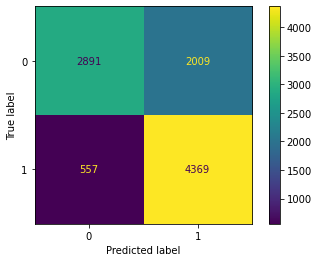

In [5]:
print(metrics.classification_report(Y_test, y_pred))
metrics.plot_confusion_matrix(clf, X_test, Y_test)

In [9]:
import matplotlib.pyplot as plt

In [10]:
titles_options = [ (" confusion matrix với Hidden Layer=128, Activation='relu', Solver='adam'", 'true')]

 confusion matrix với Hidden Layer=128, Activation='relu', Solver='adam'
[[0.88183673 0.11816327]
 [0.37231019 0.62768981]]


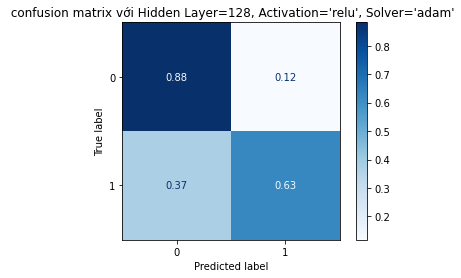

In [11]:
from sklearn.metrics import plot_confusion_matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
from matplotlib import pyplot

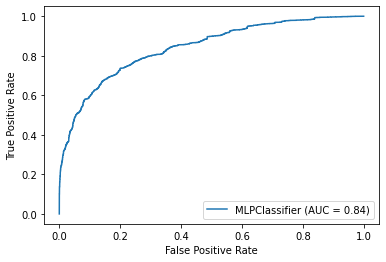

In [14]:
metrics.plot_roc_curve(clf, X_test, Y_test)
plt.show()